# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
%pip install palmerpenguins
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import *
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


C:\Python312\Lib\site-packages\palmerpenguins\penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [5]:
penguins = penguins.dropna()
categoricals = ["species", "island", "sex"]

penguins = pd.get_dummies(penguins, columns=categoricals, drop_first=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


In [6]:
x = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Model 1": ["bill_length_mm"],
    "Model 2": ["bill_length_mm", "flipper_length_mm"],
    "Model 3": ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    "Model 4": x.columns.tolist()  # all predictors
}

results = []

for name, cols in models.items():
    lr = LinearRegression()
    lr.fit(x_train[cols], y_train)
    y_train_pred = lr.predict(x_train[cols])
    y_test_pred  = lr.predict(x_test[cols])

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)
    results.append({"Model": name, "Train_MSE": train_mse, "Test_MSE": test_mse})

errors = pd.DataFrame(results)
errors

,Model,Train_MSE,Test_MSE
0,Model 1,3.620640,3.883379
1,Model 2,2.323142,2.852803
2,Model 3,2.313887,2.829649
3,Model 4,0.529104,0.895856


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

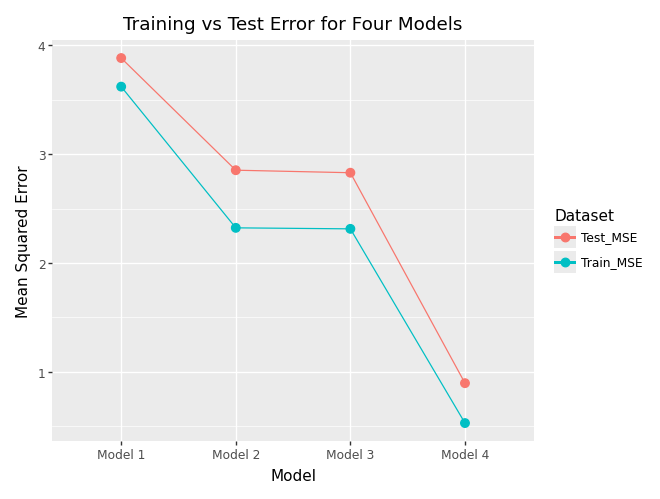

In [8]:
# Code Here
errors_long = errors.melt(id_vars="Model", value_vars=["Train_MSE", "Test_MSE"],
                          var_name="Dataset", value_name="MSE")

(ggplot(errors_long, aes(x="Model", y="MSE", color="Dataset", group="Dataset"))
+ geom_point(size=3)
+ geom_line()
+ labs(
    title="Training vs Test Error for Four Models",
    x="Model",
    y="Mean Squared Error"
))

it looks like the best performing model was Model 4, since it has the least MSE. This means that including more predictors improves bias, and the model is able to learn this connection and generalize well during training.